In [ ]:
# Artificial neural network called LSTM to prdict the closing stock price of a corporation(Apple.inc) using past 60 day stock price

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web
import datetime
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Getting stock quote
company = 'AAPL'

# Fetch stock data using yfinance
df = yf.download(company, start='2012-01-01', end='2023-01-05')

# Print the DataFrame
print(df)
#df = web.DataReader('AAPL',data_source = 'yahoo', start = '2012-01-01', end= '2019-12-17')
#df

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2012-01-03   14.621429   14.732143  ...   12.482925  302220800
2012-01-04   14.642857   14.810000  ...   12.550012  260022000
2012-01-05   14.819643   14.948214  ...   12.689335  271269600
2012-01-06   14.991786   15.098214  ...   12.821994  318292800
2012-01-09   15.196429   15.276786  ...   12.801653  394024400
...                ...         ...  ...         ...        ...
2022-12-28  129.669998  131.029999  ...  125.674019   85438400
2022-12-29  127.989998  130.479996  ...  129.233658   75703700
2022-12-30  128.410004  129.949997  ...  129.552719   77034200
2023-01-03  130.279999  130.899994  ...  124.706833  112117500
2023-01-04  126.889999  128.660004  ...  125.993095   89113600

[2770 rows x 6 columns]


In [ ]:
df.shape

(2770, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

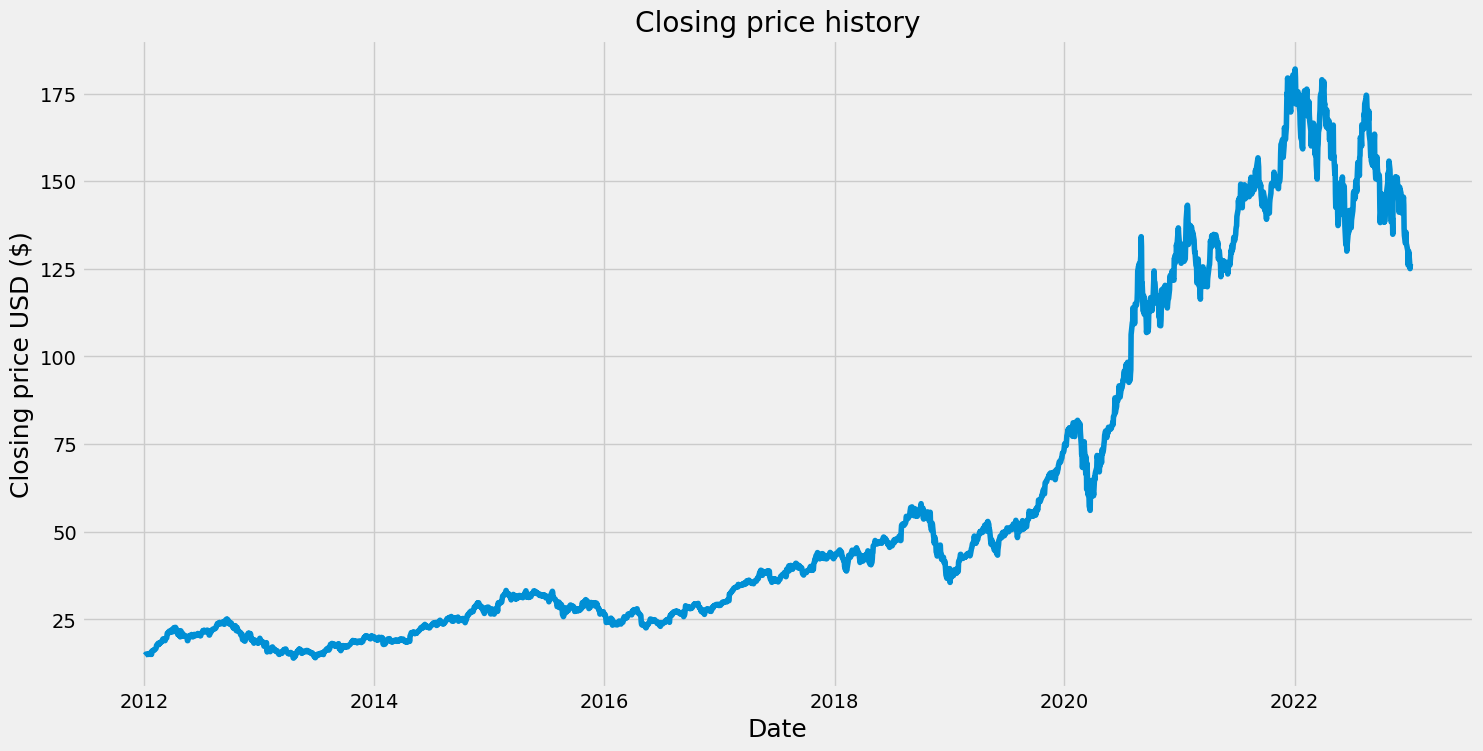

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Closing price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price USD ($)',fontsize=18)
plt.show


In [ ]:
#Creating dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert datafram to numpy array
dataset = data.values
# Getting no. of rows to train the model
training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

2216

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.69011526],
       [0.66119749],
       [0.66887321]])

In [ ]:
#Creating training data set
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :] #last : is for getting all the columns
#Splting the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i ,0])
  y_train.append(train_data[i,0])
  if i <=61:
    print(x_train)  #there are 2 pass through - past 60 days for 1st and past 60 days for 2nd pass through
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
#converting x_train and y_train into numpy array so we can use it for LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape #(2156, 60) which is 2D so we have to convert it to 3D


(2156, 60, 1)

In [ ]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1)))  #lstm layer 1
model.add(LSTM(50, return_sequences = False)) # 2nd layer
model.add(Dense(25)) # another layer with 25 neurons
model.add(Dense(1))


In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error') #optimizzer is used to improve on the loss function
                                                              #loss function is used to measure how well the model did on training


In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size =1, epochs = 1)

2156/2156 [==============================] - 46s 20ms/step - loss: 5.7431e-04


In [ ]:
#creatinf testing dataset
#create a new array containing scaled value from index 2156 to 2770
test_data = scaled_data[training_data_len-60:,:]
#create the dataset x_test and y_test
x_test =[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data into numpy arrya
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#x_test

In [ ]:
#get models predicted vlaue
predictions= model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 24ms/step


In [ ]:
# Get root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.640425100013708

<ipython-input-40-832888b08dff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


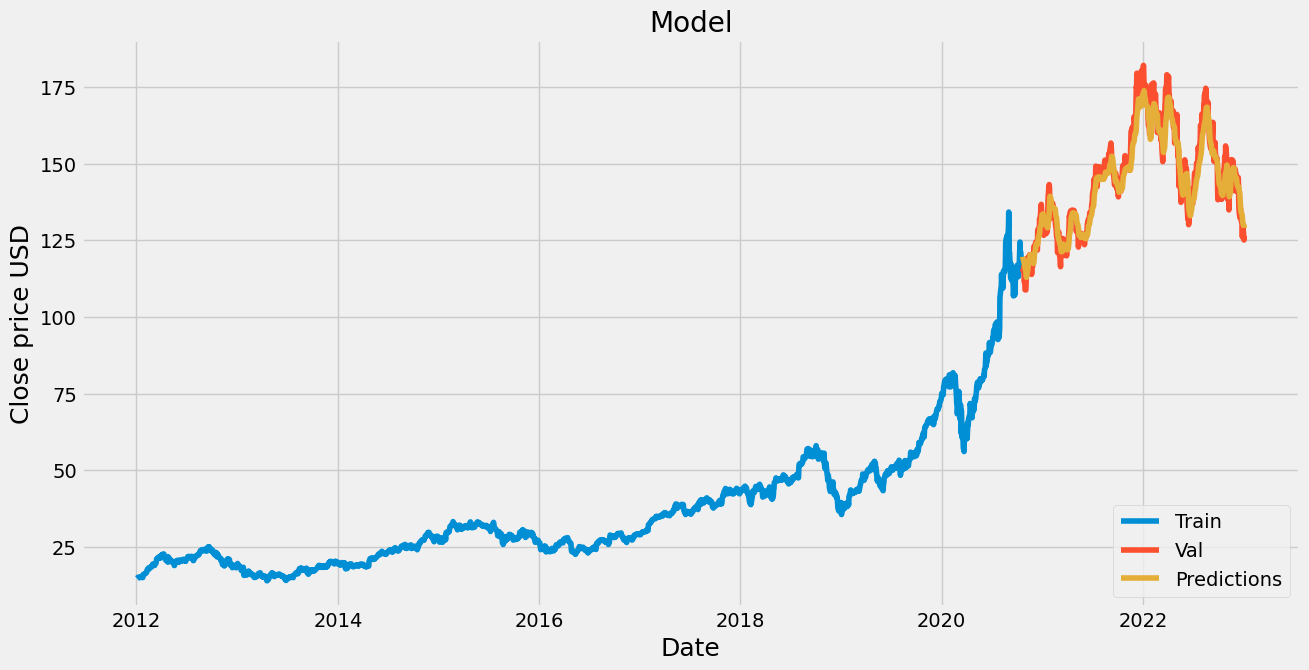

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visulaizing the data
plt.figure(figsize = (14,7))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [ ]:
#showing valid(actual price ) and predictions(predicted price)
valid

,Close,Predictions
Date,,
2020-10-22,115.750000,119.613258
2020-10-23,115.040001,118.906715
2020-10-26,115.050003,118.154976
2020-10-27,116.599998,117.487343
2020-10-28,111.199997,117.163254
...,...,...
2022-12-28,126.040001,132.468079
2022-12-29,129.610001,131.148163
2022-12-30,129.929993,130.304230


In [ ]:
#trying an predicting closing price of apple stock for january 5th 2023
'''company = 'AAPL'

# Fetch stock data using yfinance
df = yf.download(company, start='2012-01-01', end='2023-01-05')'''
apple_quote = yf.download(company,start='2012-01-01', end='2023-01-05')
#creating new dataframe
new_df = apple_quote.filter(['Close'])
#getting the last 60 days closing price values and converting datafram to arrya
last_60_days= new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test =[]
#append the last 60 days
X_test.append(last_60_days_scaled)
#converting the X_test into numpy array
X_test = np.array(X_test)
#Respahing the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#getting the predicited prices
pred_price = model.predict(X_test)
#unscaling
pred_price = scaler.inverse_transform(pred_price)
print("Predicted price for 5th january 2023 is {}".format(pred_price))


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 21ms/step
Predicted price for 5th january 2023 is [[128.26907]]


In [ ]:
#actual price
apple_quote2 = yf.download(company,start='2012-01-01', end='2023-08-06')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2023-07-31    196.449997
2023-08-01    195.610001
2023-08-02    192.580002
2023-08-03    191.169998
2023-08-04    181.990005
Name: Close, Length: 2916, dtype: float64
